# Importing pandas and Reading a CSV

In [1]:
import pandas as pd
# Reading CSV
file = "C:/Users/saimi/Downloads/bbc_news.csv"
df = pd.read_csv(file)
df.head()

C:\Users\saimi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


title  \
0  Ukraine: Angry Zelensky vows to punish Russian...   
1  War in Ukraine: Taking cover in a town under a...   
2         Ukraine war 'catastrophic for global food'   
3  Manchester Arena bombing: Saffie Roussos's par...   
4  Ukraine conflict: Oil price soars to highest l...   

                         pubDate  \
0  Mon, 07 Mar 2022 08:01:56 GMT   
1  Sun, 06 Mar 2022 22:49:58 GMT   
2  Mon, 07 Mar 2022 00:14:42 GMT   
3  Mon, 07 Mar 2022 00:05:40 GMT   
4  Mon, 07 Mar 2022 08:15:53 GMT   

                                               guid  \
0  https://www.bbc.co.uk/news/world-europe-60638042   
1  https://www.bbc.co.uk/news/world-europe-60641873   
2      https://www.bbc.co.uk/news/business-60623941   
3            https://www.bbc.co.uk/news/uk-60579079   
4      https://www.bbc.co.uk/news/business-60642786   

                                                link  \
0  https://www.bbc.co.uk/news/world-europe-606380...   
1  https://www.bbc.co.uk/news/world-europe-606418...   
2  https://www.bbc.co.uk/news/business-60623941?a...   
3  https://www.bbc.co.uk/news/uk-60579079?at_medi...   
4  https://www.bbc.co.uk/news/business-60642786?a...   

                                         description  
0  The Ukrainian president says the country will ...  
1  Jeremy Bowen was on the frontline in Irpin, as...  
2  One of the world's biggest fertiliser firms sa...  
3  The parents of the Manchester Arena bombing's ...  
4  Consumers are feeling the impact of higher ene...

# Printing Multiple Texts

In [3]:
print(repr(df.iloc[2666]["description"][0:400]))
print(repr(df.iloc[4726]["description"][0:400]))

'Voters in the Philippines presidential election are facing an onslaught of online lies.'
'China promised to protect democratic freedoms for 50 years but new laws have effectively silenced all criticism.'


# Spliting Speech into a Sentence

In [4]:
import re

df["paragraphs"] = df["description"].map(lambda text: re.split(r'\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)


# Importing TFIDF Vectorization

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['description'])
tfidf_text_vectors.shape


C:\Users\saimi\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(30037, 8257)

# Creating a DataFrame on Sentences

In [7]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "description": paragraph, "pubDate": pubDate } 
                               for paragraphs, pubDate in zip(df["paragraphs"], df["pubDate"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)


description  \
0  The Ukrainian president says the country will ...   
1  Jeremy Bowen was on the frontline in Irpin, as...   
2  One of the world's biggest fertiliser firms sa...   
3  The parents of the Manchester Arena bombing's ...   
4  Consumers are feeling the impact of higher ene...   
5  Boris Johnson is to meet the Canadian and Dutc...   
6  The home secretary says she is "surging capaci...   
7  TikTok suspends live streaming and new content...   
8  Five things you need to know about the coronav...   
9  People have been held in 53 cities, from St Pe...   

                         pubDate  
0  Mon, 07 Mar 2022 08:01:56 GMT  
1  Sun, 06 Mar 2022 22:49:58 GMT  
2  Mon, 07 Mar 2022 00:14:42 GMT  
3  Mon, 07 Mar 2022 00:05:40 GMT  
4  Mon, 07 Mar 2022 08:15:53 GMT  
5  Mon, 07 Mar 2022 08:33:29 GMT  
6  Mon, 07 Mar 2022 08:09:21 GMT  
7  Mon, 07 Mar 2022 00:11:59 GMT  
8  Mon, 07 Mar 2022 07:46:30 GMT  
9  Sun, 06 Mar 2022 23:23:59 GMT

# TFIDF DataFrame

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["description"])
tfidf_para_vectors.shape


C:\Users\saimi\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(30037, 8257)

# NMF 

In [9]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

# Displaying Topics

In [10]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  world (4.01)
  cup (3.38)
  england (2.66)
  final (1.56)
  women (1.29)

Topic 01
  days (9.83)
  seven (9.66)
  past (9.63)
  closely (6.81)
  attention (6.74)

Topic 02
  says (7.81)
  england (0.47)
  president (0.44)
  boss (0.41)
  manager (0.41)

Topic 03
  league (3.38)
  manchester (2.57)
  premier (1.94)
  city (1.91)
  united (1.59)

Topic 04
  year (6.78)
  old (4.45)
  police (1.27)
  man (0.89)
  died (0.59)

Topic 05
  bbc (7.14)
  sport (1.66)
  tells (1.33)
  looks (0.88)
  editor (0.72)

Topic 06
  ukraine (5.81)
  russia (3.98)
  war (2.51)
  russian (2.37)
  invasion (1.62)

Topic 07
  people (7.41)
  young (1.17)
  children (0.99)
  killed (0.98)
  died (0.83)

Topic 08
  minister (5.76)
  prime (4.96)
  sunak (1.79)
  rishi (1.76)
  leader (1.40)

Topic 09
  uk (3.03)
  new (1.94)
  government (1.36)
  years (0.87)
  energy (0.66)


In [11]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
  world (4.01)
  cup (3.38)
  england (2.66)
  final (1.56)
  women (1.29)

Topic 01
  days (9.83)
  seven (9.66)
  past (9.63)
  closely (6.81)
  attention (6.74)

Topic 02
  says (7.81)
  england (0.47)
  president (0.44)
  boss (0.41)
  manager (0.41)

Topic 03
  league (3.38)
  manchester (2.57)
  premier (1.94)
  city (1.91)
  united (1.59)

Topic 04
  year (6.78)
  old (4.45)
  police (1.27)
  man (0.89)
  died (0.59)

Topic 05
  bbc (7.14)
  sport (1.66)
  tells (1.33)
  looks (0.88)
  editor (0.72)

Topic 06
  ukraine (5.81)
  russia (3.98)
  war (2.51)
  russian (2.37)
  invasion (1.62)

Topic 07
  people (7.41)
  young (1.17)
  children (0.99)
  killed (0.98)
  died (0.83)

Topic 08
  minister (5.76)
  prime (4.96)
  sunak (1.79)
  rishi (1.76)
  leader (1.40)

Topic 09
  uk (3.03)
  new (1.94)
  government (1.36)
  years (0.87)
  energy (0.66)


# Size Of Topics

In [12]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 9.16455424,  4.53849504, 10.3158148 , 11.22451979, 11.01084617,
        9.88257879,  7.75654367, 10.73127883,  7.56463965, 17.81072903])

In [13]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 9.16455424,  4.53849504, 10.3158148 , 11.22451979, 11.01084617,
        9.88257879,  7.75654367, 10.73127883,  7.56463965, 17.81072903])

# Count Vectorization

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Reduce the size of the dataset (optional)
paragraph_df_subset = paragraph_df.sample(n=100)  # Adjust the sample size as needed

# Initialize CountVectorizer with English stop words
count_para_vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.7)

# Fit and transform the CountVectorizer on the dataset
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])

# Initialize LatentDirichletAllocation with desired parameters
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42, n_jobs=-1)  # Utilize multiple CPU cores

# Fit the LDA model to the CountVectorizer output
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)

# Get the topic-word distributions
H_lda_para_matrix = lda_para_model.components_

# Breaking Paras into Words

In [16]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stopwords.words('english')  # Get English stopwords
count_para_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])
count_para_vectors.shape

(30037, 8374)

# LDA

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

# Display Topics and Topic Size

In [18]:
# Assuming count_para_vectorizer is properly initialized and fitted
feature_names = count_para_vectorizer.get_feature_names_out()

# Then use the feature names with the display_topics function
display_topics(lda_para_model, feature_names)


Topic 00
  bbc (2.39)
  days (1.42)
  says (1.32)
  past (1.18)
  seven (1.09)

Topic 01
  year (1.92)
  old (1.47)
  says (1.28)
  say (0.95)
  police (0.88)

Topic 02
  queen (1.29)
  king (1.19)
  star (1.03)
  one (0.86)
  prince (0.73)

Topic 03
  two (1.61)
  people (1.53)
  police (1.31)
  says (0.93)
  killed (0.86)

Topic 04
  world (3.67)
  england (3.22)
  cup (2.43)
  final (1.43)
  women (1.33)

Topic 05
  league (2.94)
  manchester (2.05)
  united (1.46)
  city (1.24)
  premier (1.21)

Topic 06
  says (1.45)
  minister (1.24)
  papers (1.00)
  us (0.94)
  pm (0.93)

Topic 07
  people (1.08)
  uk (1.07)
  rising (1.00)
  living (0.93)
  cost (0.91)

Topic 08
  ukraine (2.79)
  russian (1.62)
  russia (1.56)
  war (1.28)
  first (1.24)

Topic 09
  says (1.64)
  people (1.55)
  say (0.87)
  pay (0.86)
  new (0.84)


In [19]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.70251487, 11.15135545,  8.23808741, 10.09552998, 11.12298457,
        9.13124298, 12.00510156,  8.88098045,  8.95837866, 11.71382408])

# WorldClouds

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

C:\Users\saimi\AppData\Local\Temp\ipykernel_26212\3253276570.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# NMF WorldClouds

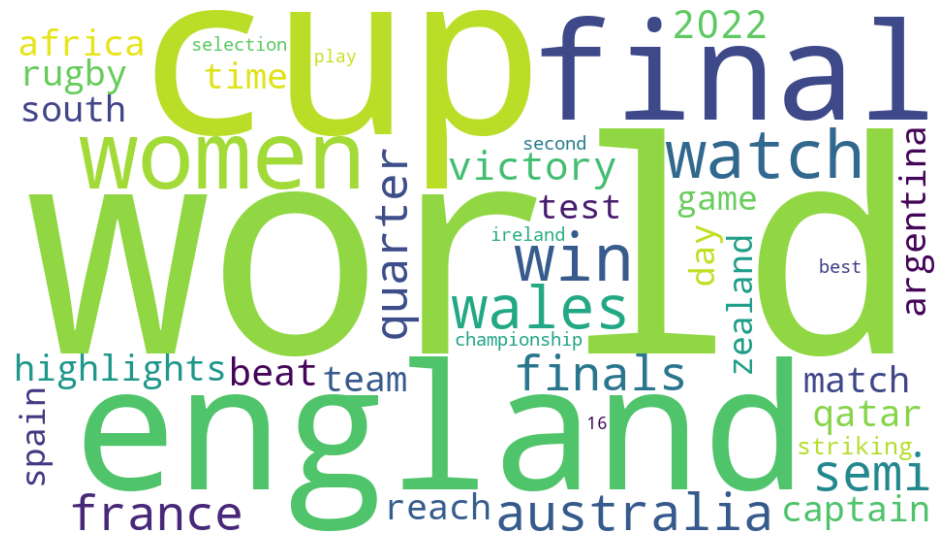

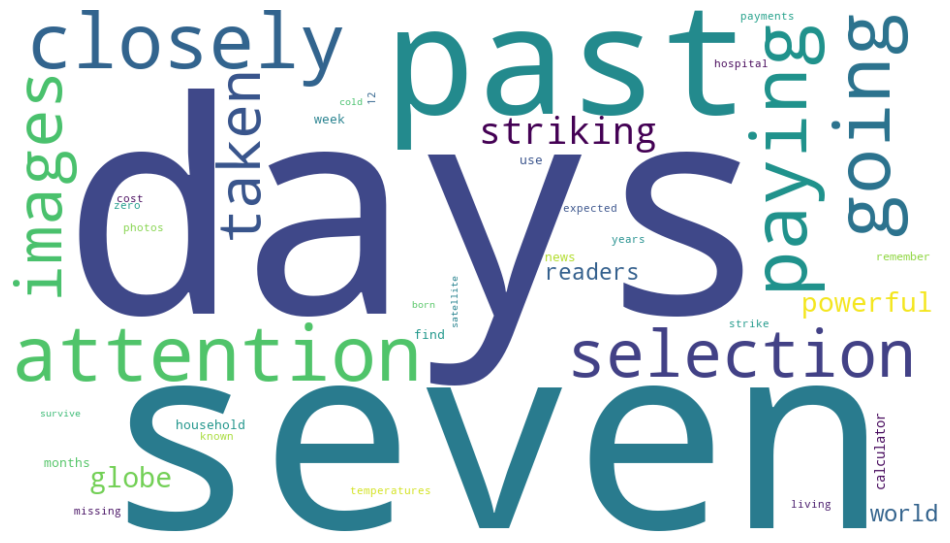

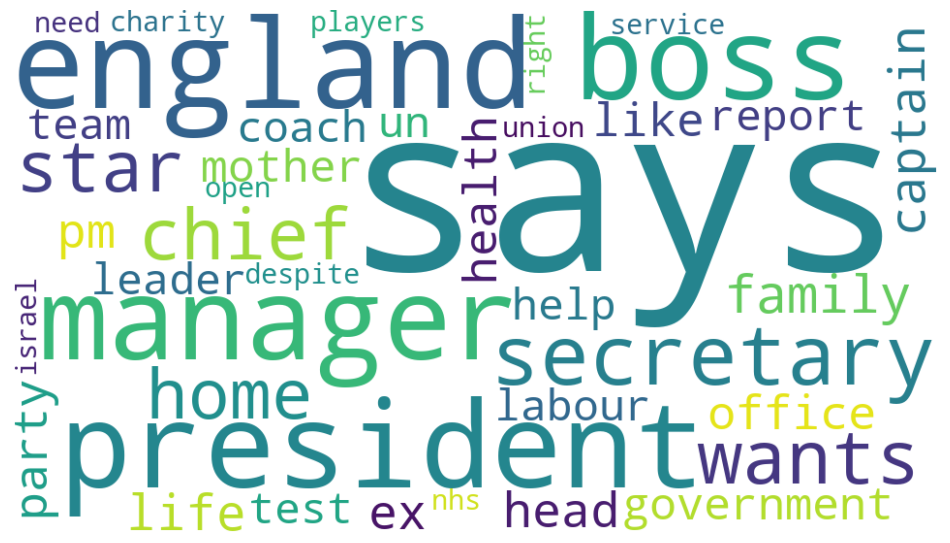

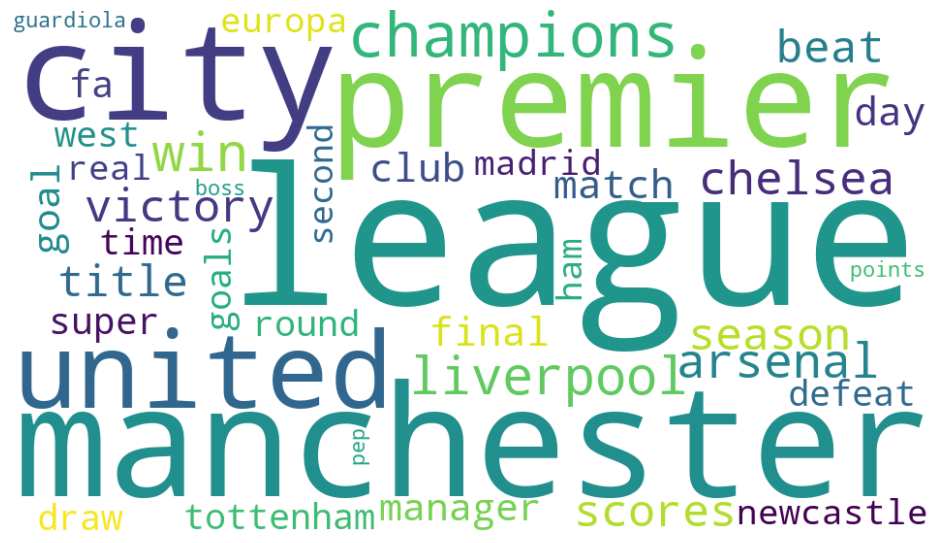

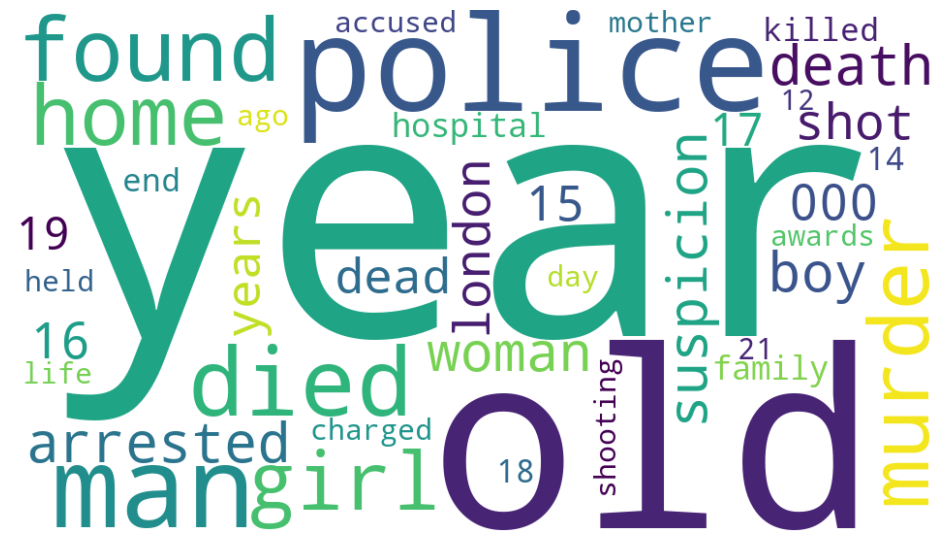

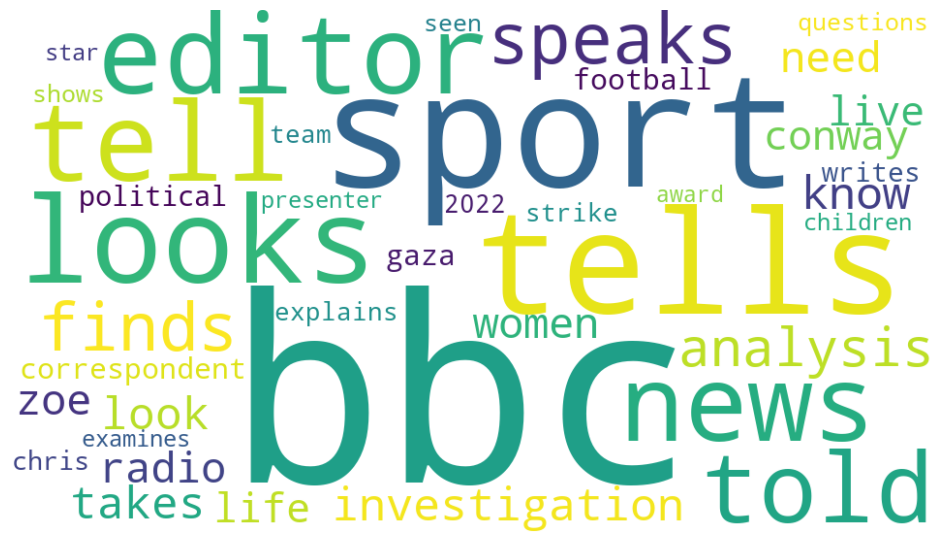

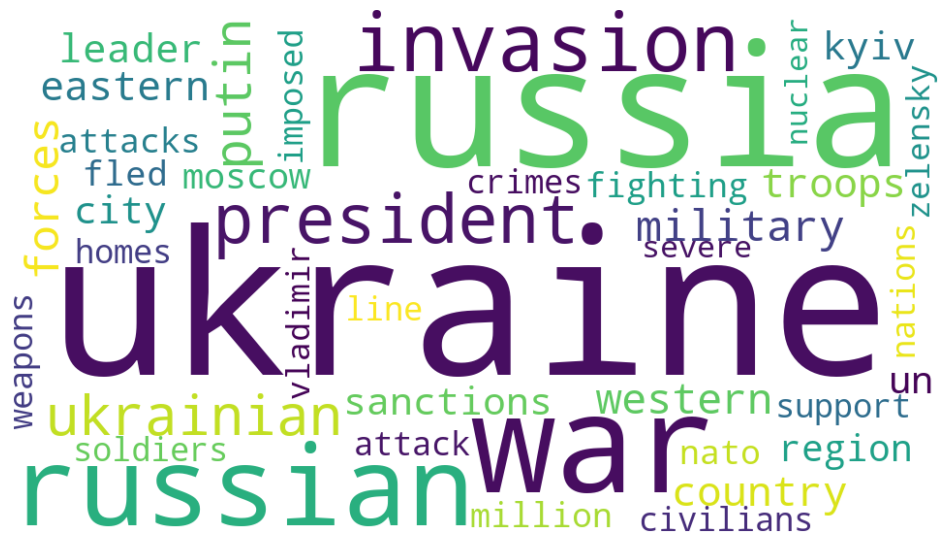

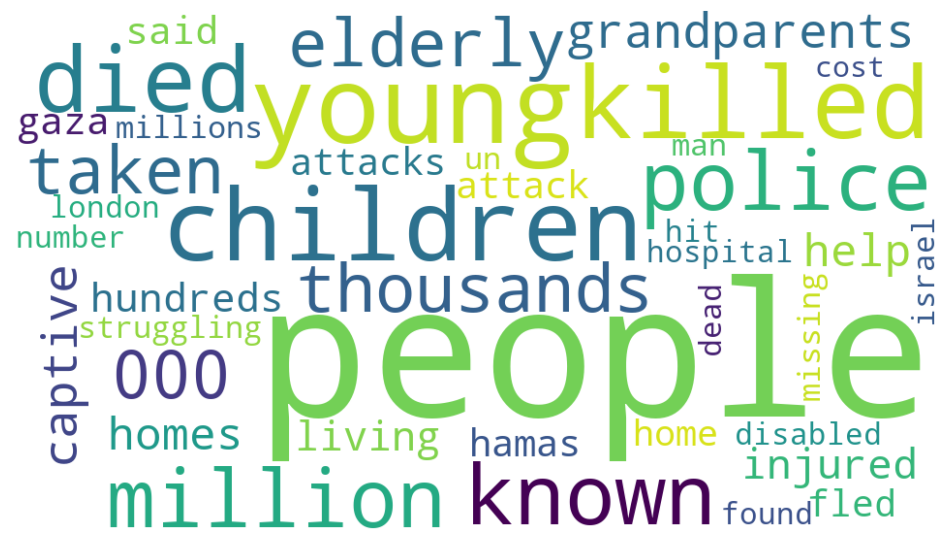

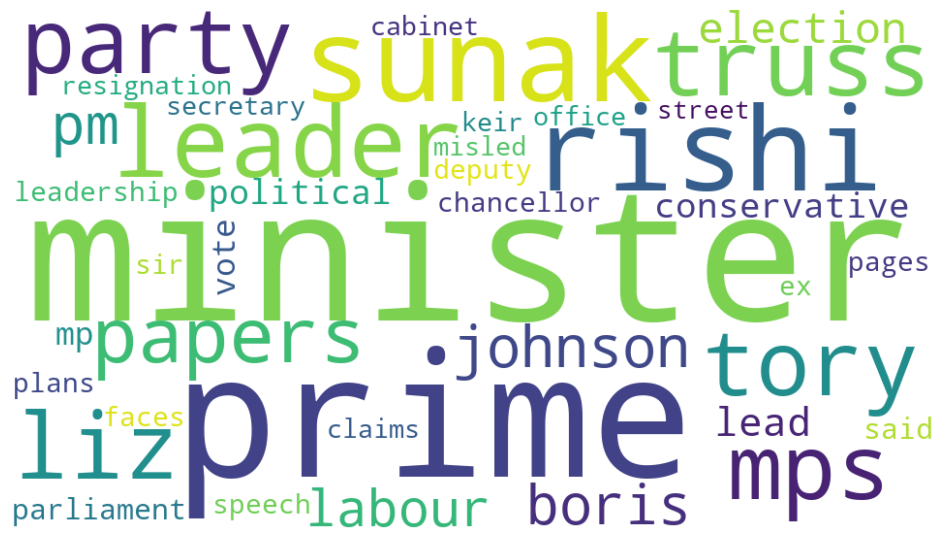

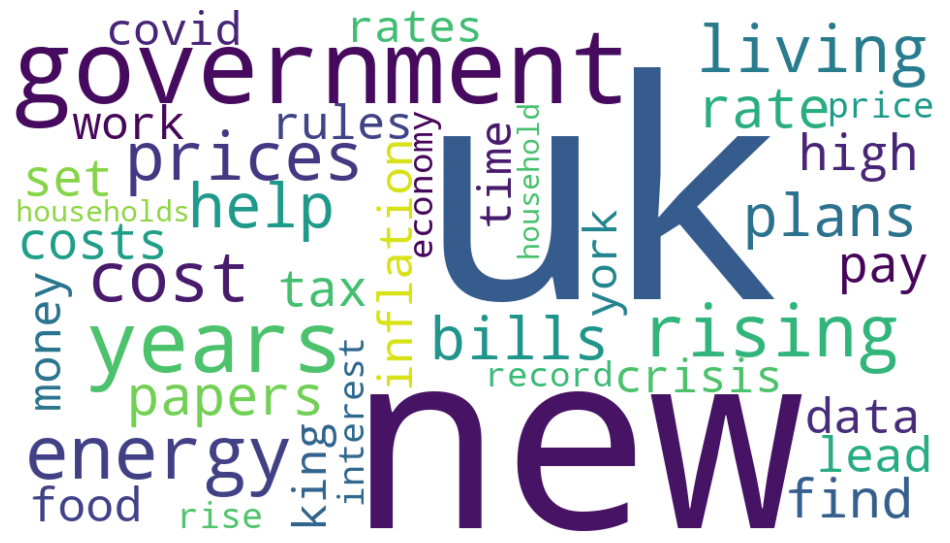

In [21]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

# LDA WorldClouds

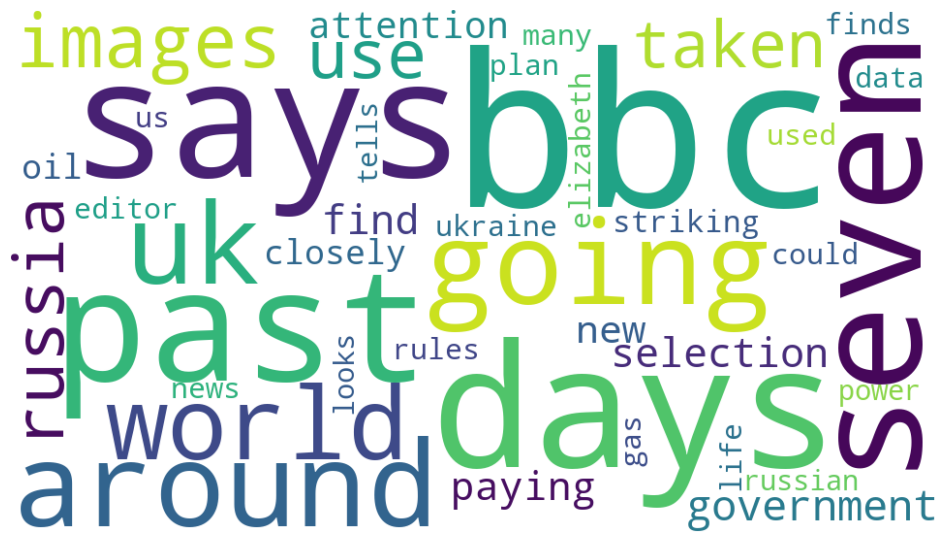

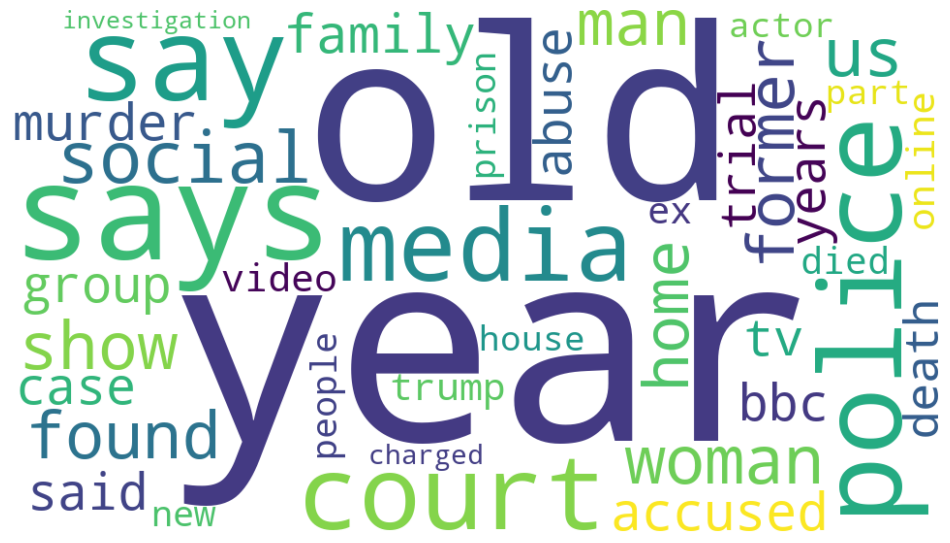

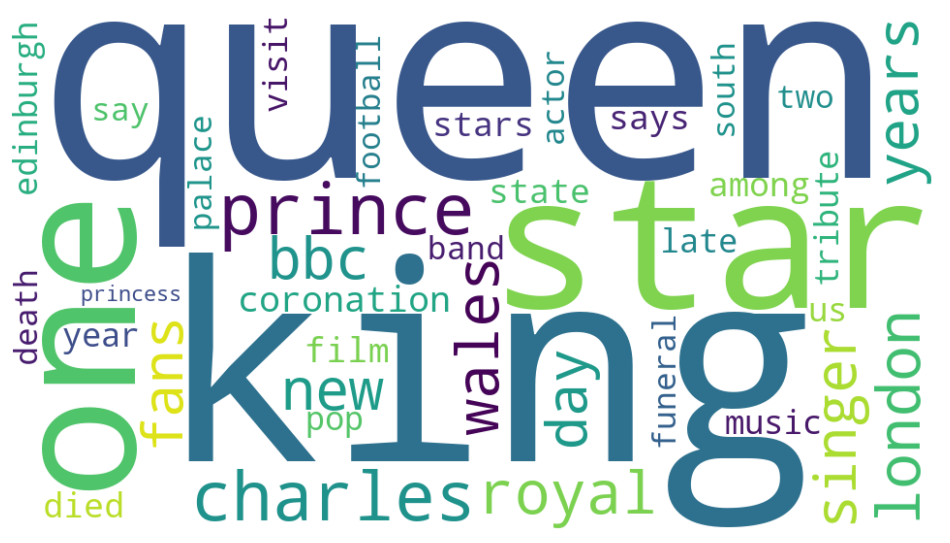

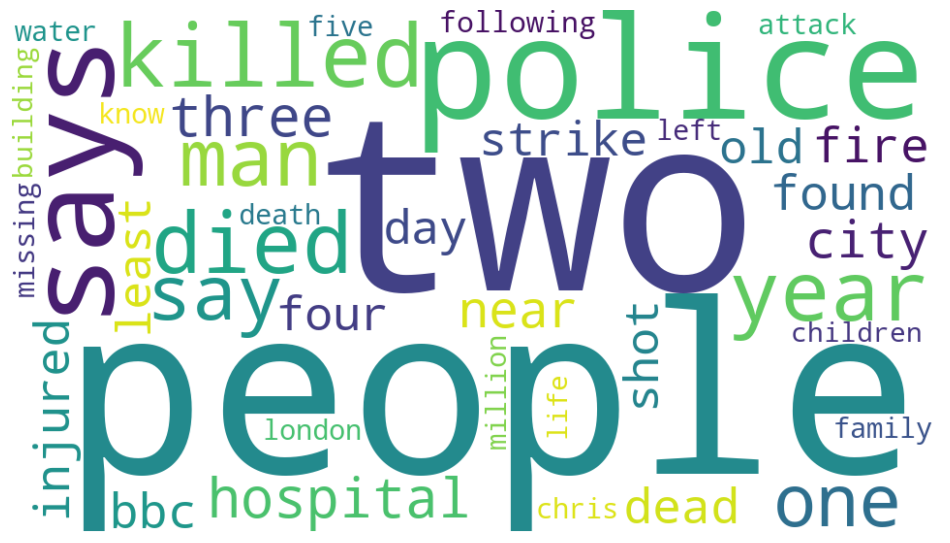

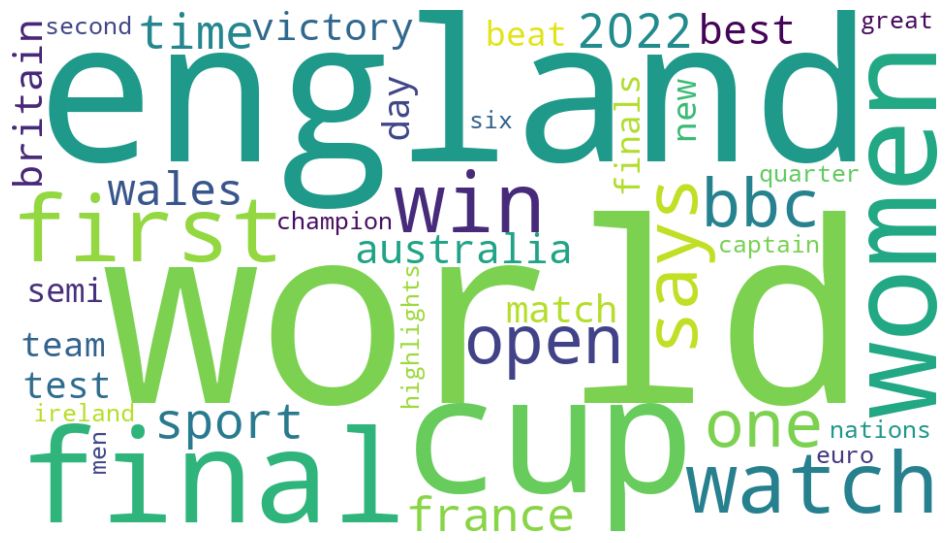

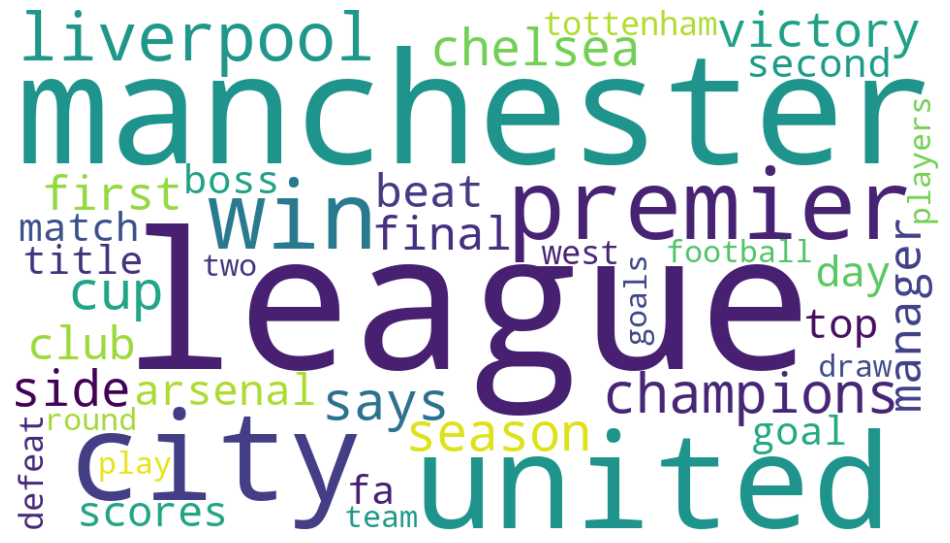

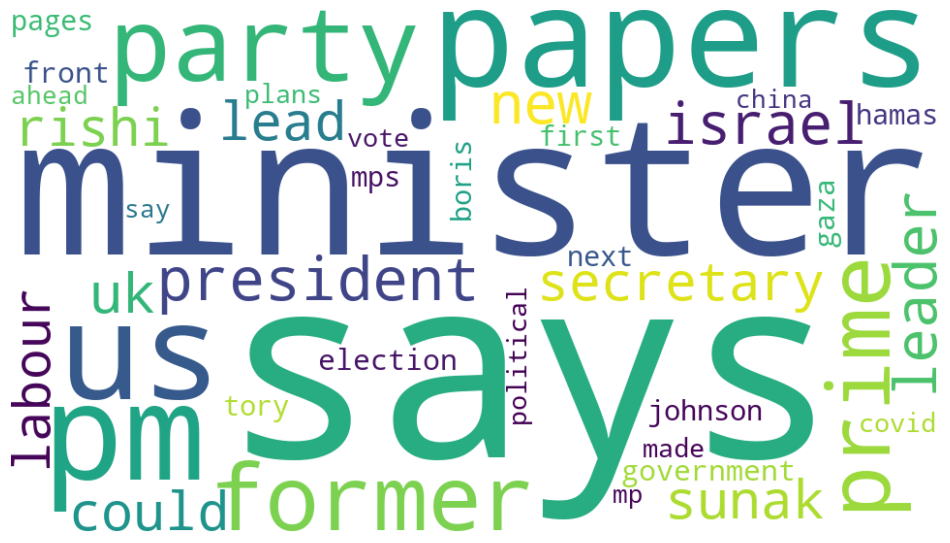

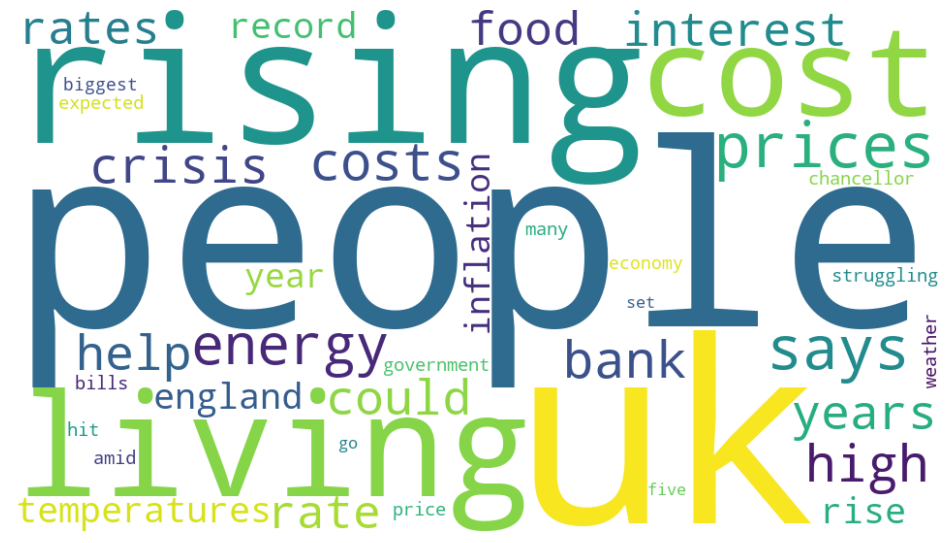

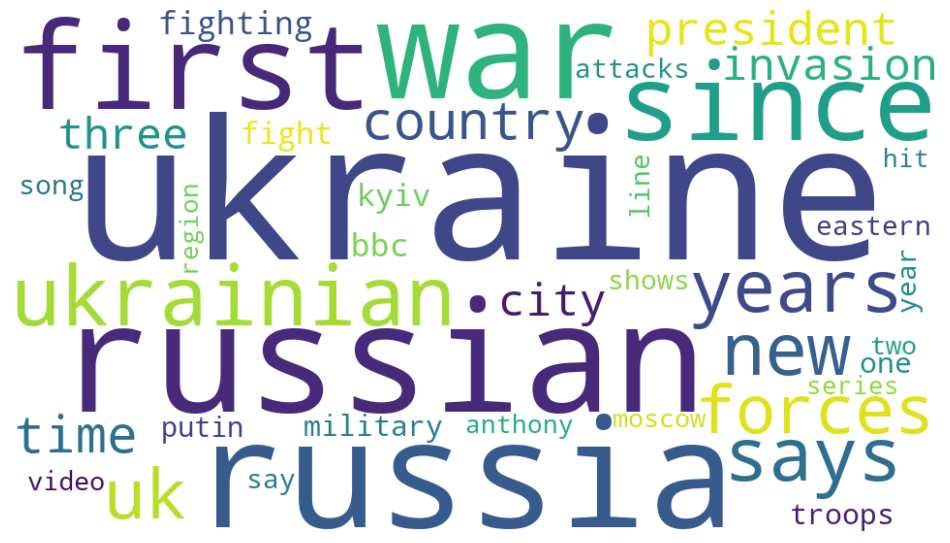

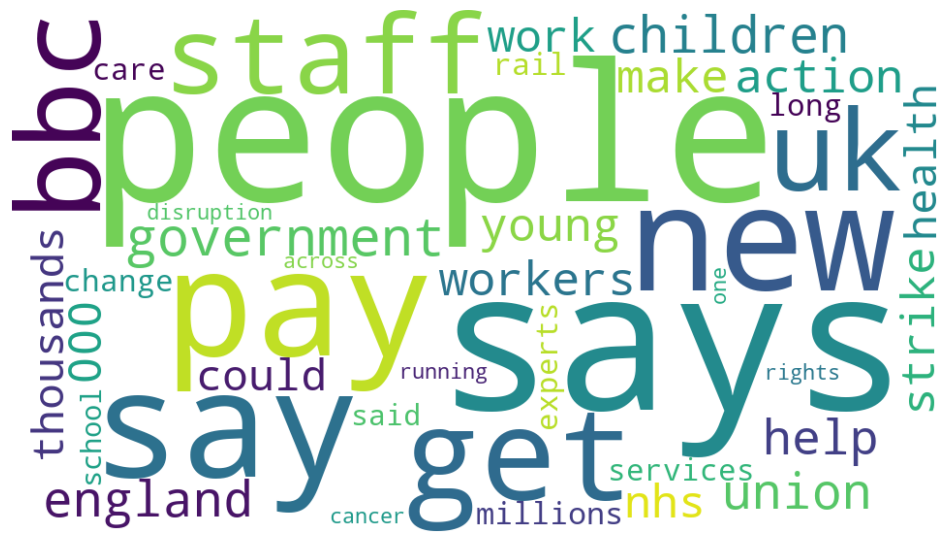

In [22]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [23]:
topic_names = []
voc = tfidf_para_vectorizer.vocabulary_
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = [word for word, index in voc.items() if index == important[-1]][0] + " " + [word for word, index in voc.items() if index == important[-2]][0]
    topic_names.append("Topic " + top_word)


# Separating Data By Year

In [37]:
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer


# Convert 'pubDate' to datetime and extract year
paragraph_df['year'] = pd.to_datetime(paragraph_df['pubDate']).dt.year

# Assuming nmf_para_model is your trained NMF model and tfidf_para_vectors is your TF-IDF matrix
# If you need to train the NMF model, you would do something like this (with your own data):
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_para_vectors = tfidf_vectorizer.fit_transform(paragraph_df['description'])
# nmf_para_model = NMF(n_components=5)  # for example, 5 topics
# nmf_para_model.fit(tfidf_para_vectors)

year_data = []
for year in tqdm(paragraph_df['year'].unique()):
    # Filter TF-IDF vectors for the current year
    yearly_indices = paragraph_df[paragraph_df['year'] == year].index
    W_year = nmf_para_model.transform(tfidf_para_vectors[yearly_indices])
    
    # Aggregate and normalize topic distribution for the year
    topic_dist = W_year.sum(axis=0)
    normalized_dist = topic_dist / topic_dist.sum() * 100.0
    year_data.append([year] + list(normalized_dist))

# Convert the results to a DataFrame for easier handling and visualization
columns = ['Year'] + [f'Topic_{i}' for i in range(W_year.shape[1])]
year_topic_df = pd.DataFrame(year_data, columns=columns)


  0%|          | 0/8 [00:00<?, ?it/s]

# TimeChart

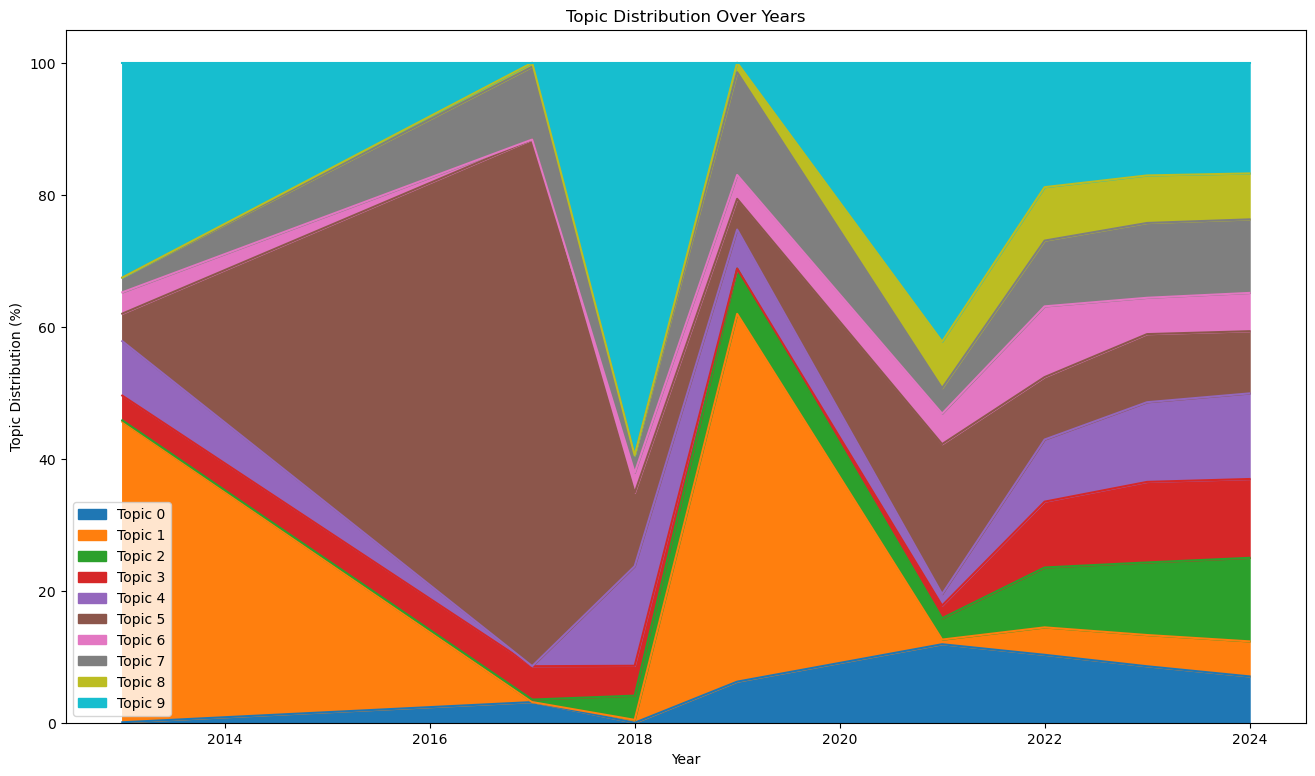

In [38]:


# Now plot
df_year.plot.area(figsize=(16, 9))
plt.title('Topic Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Topic Distribution (%)')
plt.show()
